# Phase 1: Warm-up - Exploratory Data Analysis (EDA)

This notebook performs the following steps:
1. Merging the datasets, cleaning the column names
2. Data quality assessment (missing values, duplicates, inconsistencies)
3. Uni- and multi-dimensional statistics: understanding of structure, links between variables, etc.
4. Variable recoding, transformation, possible creation of new variables

## Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## Step 1: Load and Merge Datasets, Clean Column Names

### Load the datasets

In [5]:
# Load all datasets
tracks = pd.read_csv('../DataBase/raw/tracks.tsv', sep='\t')
genres = pd.read_csv('../DataBase/raw/genres.csv')
echonest = pd.read_csv('../DataBase/raw/echonest_features.tsv', sep='\t')
spectral = pd.read_csv('../DataBase/raw/spectral_features.tsv', sep='\t')

print("Datasets loaded successfully!")
print(f"Tracks: {tracks.shape}")
print(f"Genres: {genres.shape}")
print(f"Echonest Features: {echonest.shape}")
print(f"Spectral Features: {spectral.shape}")

Datasets loaded successfully!
Tracks: (99995, 14)
Genres: (164, 5)
Echonest Features: (11440, 9)
Spectral Features: (99995, 22)


### Explore initial structure

In [6]:
print("=" * 80)
print("TRACKS DATASET")
print("=" * 80)
print(tracks.head())
print("\nColumn names:")
print(tracks.columns.tolist())
print("\nData types:")
print(tracks.dtypes)

TRACKS DATASET
   track_id           album_title  album_tracks  artist_latitude  \
0     11870  Wildahead Portibeast            10              NaN   
1     11871  Wildahead Portibeast            10              NaN   
2     11872  Wildahead Portibeast            10              NaN   
3     11873  Wildahead Portibeast            10              NaN   
4     11874  Wildahead Portibeast            10              NaN   

   artist_longitude           artist_name  duration  favorites genre_top  \
0               NaN  Wildahead Portibeast       131          0   Hip-Hop   
1               NaN  Wildahead Portibeast       185          0   Hip-Hop   
2               NaN  Wildahead Portibeast       183          0   Hip-Hop   
3               NaN  Wildahead Portibeast       213          3   Hip-Hop   
4               NaN  Wildahead Portibeast       162          0   Hip-Hop   

  genres genres_all  interest  listens                             title  
0   [21]       [21]       733      218      

In [7]:
print("=" * 80)
print("GENRES DATASET")
print("=" * 80)
print(genres.head(10))
print("\nColumn names:")
print(genres.columns.tolist())

GENRES DATASET
   genre_id genre_color        genre_handle  genre_parent_id  \
0         1     #006666         Avant-Garde             38.0   
1         2     #CC3300       International              NaN   
2         3     #000099               Blues              NaN   
3         4     #990099                Jazz              NaN   
4         5     #8A8A65           Classical              NaN   
5         6     #4D0000             Novelty             38.0   
6         7     #009999              Comedy             20.0   
7         8     #665666  Old-Time__Historic             17.0   
8         9     #663366             Country             17.0   
9        10     #009900                 Pop              NaN   

           genre_title  
0          Avant-Garde  
1        International  
2                Blues  
3                 Jazz  
4            Classical  
5              Novelty  
6               Comedy  
7  Old-Time / Historic  
8              Country  
9                  Pop  

Colu

In [8]:
print("=" * 80)
print("ECHONEST FEATURES DATASET")
print("=" * 80)
print(echonest.head())
print("\nColumn names:")
print(echonest.columns.tolist())

ECHONEST FEATURES DATASET
   track_id  acousticness  danceability    energy  instrumentalness  liveness  \
0     11870      0.373039      0.429892  0.645929          0.769285  0.195042   
1     11871      0.908215      0.427918  0.694364          0.950413  0.269082   
2     11872      0.204111      0.501329  0.608690          0.725811  0.125451   
3     11873      0.464478      0.419687  0.743163          0.786033  0.214622   
4     11874      0.921960      0.350383  0.588584          0.861204  0.120561   

   speechiness    tempo   valence  
0     0.101240  159.908  0.474554  
1     0.180927  188.077  0.585049  
2     0.623711  137.676  0.522381  
3     0.142762   79.371  0.644394  
4     0.187306  190.518  0.537996  

Column names:
['track_id', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']


In [9]:
print("=" * 80)
print("SPECTRAL FEATURES DATASET")
print("=" * 80)
print(spectral.head())
print("\nColumn names (first 10):")
print(spectral.columns.tolist()[:10])
print(f"\nTotal spectral columns: {len(spectral.columns)}")

SPECTRAL FEATURES DATASET
   track_id  spectral_bandwidth_kurtosis_01  spectral_bandwidth_max_01  \
0     11870                        1.386746                3632.703369   
1     11871                        0.988129                3607.125000   
2     11872                       -0.288111                3509.530273   
3     11873                        0.013341                3748.871338   
4     11874                        2.176594                4069.634522   

   spectral_bandwidth_mean_01  spectral_bandwidth_median_01  \
0                 1373.206787                   1240.352661   
1                 1422.162231                   1373.406982   
2                 1639.155884                   1663.023804   
3                 1424.273682                   1366.631958   
4                 1402.951172                   1350.756836   

   spectral_bandwidth_min_01  spectral_bandwidth_skew_01  \
0                 519.210815                    1.255615   
1                 367.892883  

### Merge datasets on track_id

In [10]:
# Merge tracks with echonest features
df = tracks.merge(echonest, on='track_id', how='left')
print(f"After merging with echonest: {df.shape}")

# Merge with spectral features
df = df.merge(spectral, on='track_id', how='left')
print(f"After merging with spectral: {df.shape}")

# Display the merged dataset info
print("\nMerged dataset info:")
print(df.head())

After merging with echonest: (99995, 22)
After merging with spectral: (99995, 43)

Merged dataset info:
   track_id           album_title  album_tracks  artist_latitude  \
0     11870  Wildahead Portibeast            10              NaN   
1     11871  Wildahead Portibeast            10              NaN   
2     11872  Wildahead Portibeast            10              NaN   
3     11873  Wildahead Portibeast            10              NaN   
4     11874  Wildahead Portibeast            10              NaN   

   artist_longitude           artist_name  duration  favorites genre_top  \
0               NaN  Wildahead Portibeast       131          0   Hip-Hop   
1               NaN  Wildahead Portibeast       185          0   Hip-Hop   
2               NaN  Wildahead Portibeast       183          0   Hip-Hop   
3               NaN  Wildahead Portibeast       213          3   Hip-Hop   
4               NaN  Wildahead Portibeast       162          0   Hip-Hop   

  genres genres_all  interest 

### Clean column names

In [11]:
# Clean column names: lowercase, replace spaces/special characters with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('-', '_').str.replace('/', '_')

print("Cleaned column names:")
print(df.columns.tolist()[:20])  # Show first 20 columns
print(f"\nTotal columns: {len(df.columns)}")

Cleaned column names:
['track_id', 'album_title', 'album_tracks', 'artist_latitude', 'artist_longitude', 'artist_name', 'duration', 'favorites', 'genre_top', 'genres', 'genres_all', 'interest', 'listens', 'title', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness']

Total columns: 43


## Step 2: Data Quality Assessment

### 2.1 Missing Values Analysis

In [12]:
# Calculate missing values
missing_stats = pd.DataFrame({
    'column': df.columns,
    'missing_count': df.isnull().sum(),
    'missing_percentage': (df.isnull().sum() / len(df) * 100).round(2)
})

# Filter columns with missing values
missing_stats = missing_stats[missing_stats['missing_count'] > 0].sort_values('missing_percentage', ascending=False)

print("Columns with missing values:")
print(missing_stats)
print(f"\nTotal columns with missing values: {len(missing_stats)}")
print(f"Total columns: {len(df.columns)}")

Columns with missing values:
                            column  missing_count  missing_percentage
speechiness            speechiness          89587               89.59
danceability          danceability          89461               89.47
valence                    valence          89463               89.47
acousticness          acousticness          89442               89.45
energy                      energy          89442               89.45
instrumentalness  instrumentalness          89442               89.45
liveness                  liveness          89442               89.45
tempo                        tempo          89442               89.45
artist_latitude    artist_latitude          59788               59.79
artist_longitude  artist_longitude          59788               59.79
genre_top                genre_top          55362               55.36
album_title            album_title            911                0.91
title                        title              1            

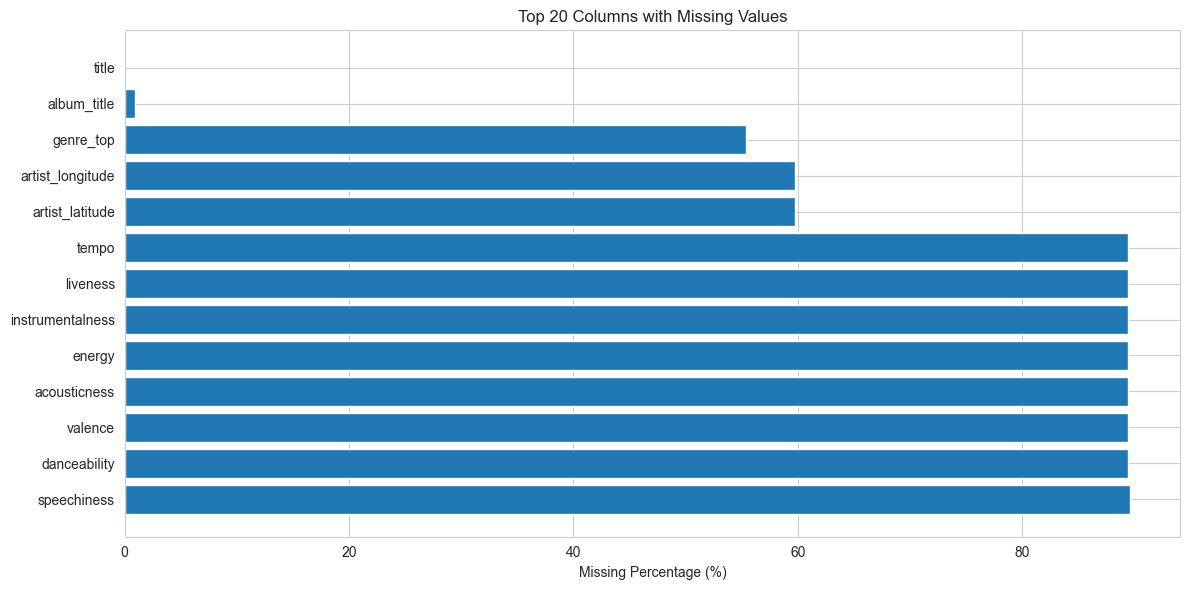

In [13]:
# Visualize missing values for columns with > 0% missing
if len(missing_stats) > 0:
    plt.figure(figsize=(12, 6))
    plt.barh(missing_stats['column'][:20], missing_stats['missing_percentage'][:20])
    plt.xlabel('Missing Percentage (%)')
    plt.title('Top 20 Columns with Missing Values')
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found!")

### 2.2 Duplicate Records

In [14]:
# Check for duplicate track_ids
duplicate_tracks = df['track_id'].duplicated().sum()
print(f"Number of duplicate track_ids: {duplicate_tracks}")

# Check for fully duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of fully duplicate rows: {duplicate_rows}")

# Check if track_id is unique
print(f"\nTotal tracks: {len(df)}")
print(f"Unique track_ids: {df['track_id'].nunique()}")

Number of duplicate track_ids: 0
Number of fully duplicate rows: 0

Total tracks: 99995
Unique track_ids: 99995


### 2.3 Data Type Inconsistencies

In [15]:
# Display data types summary
print("Data types distribution:")
print(df.dtypes.value_counts())

print("\n" + "="*80)
print("Sample of different data types:")
print("="*80)

# Show examples of each data type
for dtype in df.dtypes.unique():
    cols = df.select_dtypes(include=[dtype]).columns[:3]
    print(f"\n{dtype}: {list(cols)}")

Data types distribution:
float64    31
int64       6
object      6
Name: count, dtype: int64

Sample of different data types:

int64: ['track_id', 'album_tracks', 'duration']

object: ['album_title', 'artist_name', 'genre_top']

float64: ['artist_latitude', 'artist_longitude', 'acousticness']


In [16]:
# Check for inconsistencies in key columns
print("Checking data consistency:")
print("\n1. Duration (should be positive):")
print(f"   Min: {df['duration'].min()}, Max: {df['duration'].max()}")
print(f"   Negative or zero durations: {(df['duration'] <= 0).sum()}")

print("\n2. Favorites, interest, listens (should be non-negative):")
for col in ['favorites', 'interest', 'listens']:
    print(f"   {col} - Min: {df[col].min()}, Max: {df[col].max()}, Negative: {(df[col] < 0).sum()}")

print("\n3. Genre fields:")
print(f"   Tracks without genre_top: {df['genre_top'].isnull().sum()}")

Checking data consistency:

1. Duration (should be positive):
   Min: 0, Max: 11030
   Negative or zero durations: 4

2. Favorites, interest, listens (should be non-negative):
   favorites - Min: 0, Max: 1482, Negative: 0
   interest - Min: 2, Max: 3293557, Negative: 0
   listens - Min: 0, Max: 543252, Negative: 0

3. Genre fields:
   Tracks without genre_top: 55362


## Step 3: Uni- and Multi-dimensional Statistics

### 3.1 Univariate Analysis - Numerical Features

In [17]:
# Get numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Total numerical columns: {len(numerical_cols)}")

# Descriptive statistics
print("\nDescriptive Statistics (Key Features):")
key_features = ['duration', 'favorites', 'interest', 'listens', 
                'acousticness', 'danceability', 'energy', 'instrumentalness', 
                'liveness', 'speechiness', 'tempo', 'valence']
print(df[key_features].describe())

Total numerical columns: 37

Descriptive Statistics (Key Features):
           duration     favorites      interest        listens  acousticness  \
count  99995.000000  99995.000000  9.999500e+04   99995.000000  1.055300e+04   
mean     278.034522      3.239962  3.628631e+03    2403.072944  4.893790e-01   
std      294.940279     13.863871  1.957852e+04    8234.085292  3.847813e-01   
min        0.000000      0.000000  2.000000e+00       0.000000  9.491000e-07   
25%      151.000000      0.000000  6.020000e+02     305.000000  7.092254e-02   
50%      218.000000      1.000000  1.333000e+03     797.000000  4.866641e-01   
75%      307.000000      3.000000  3.117000e+03    2085.000000  8.976251e-01   
max    11030.000000   1482.000000  3.293557e+06  543252.000000  9.957965e-01   

       danceability        energy  instrumentalness      liveness  \
count  10534.000000  10553.000000      10553.000000  10553.000000   
mean       0.506784      0.541650          0.628853      0.185575   
std 

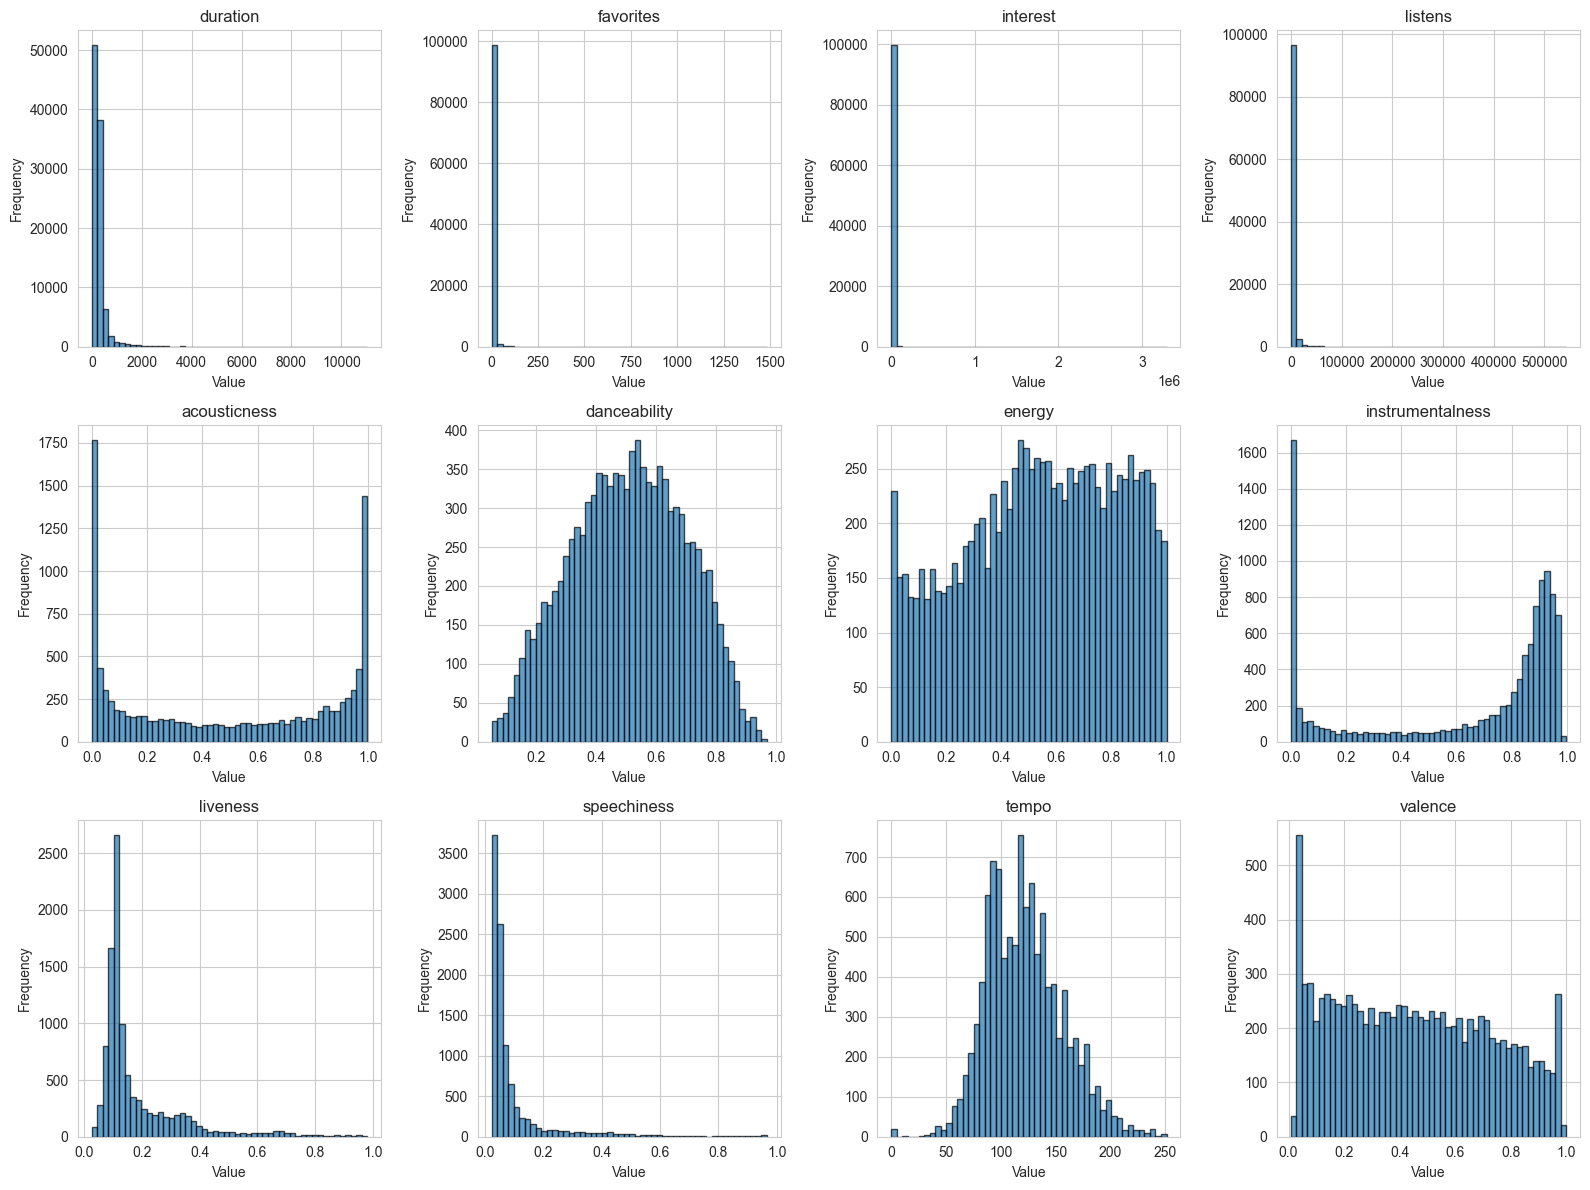

In [18]:
# Distribution of key numerical features
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.ravel()

for idx, col in enumerate(key_features):
    axes[idx].hist(df[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col}')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### 3.2 Univariate Analysis - Categorical Features

Genre Distribution:
genre_top
Rock                   12085
Experimental            9752
Electronic              8769
Hip-Hop                 3334
Folk                    2375
Pop                     2235
Instrumental            2003
International           1256
Classical               1129
Old-Time / Historic      491
Jazz                     484
Spoken                   323
Country                  163
Soul-RnB                 131
Blues                     79
Easy Listening            24
Name: count, dtype: int64


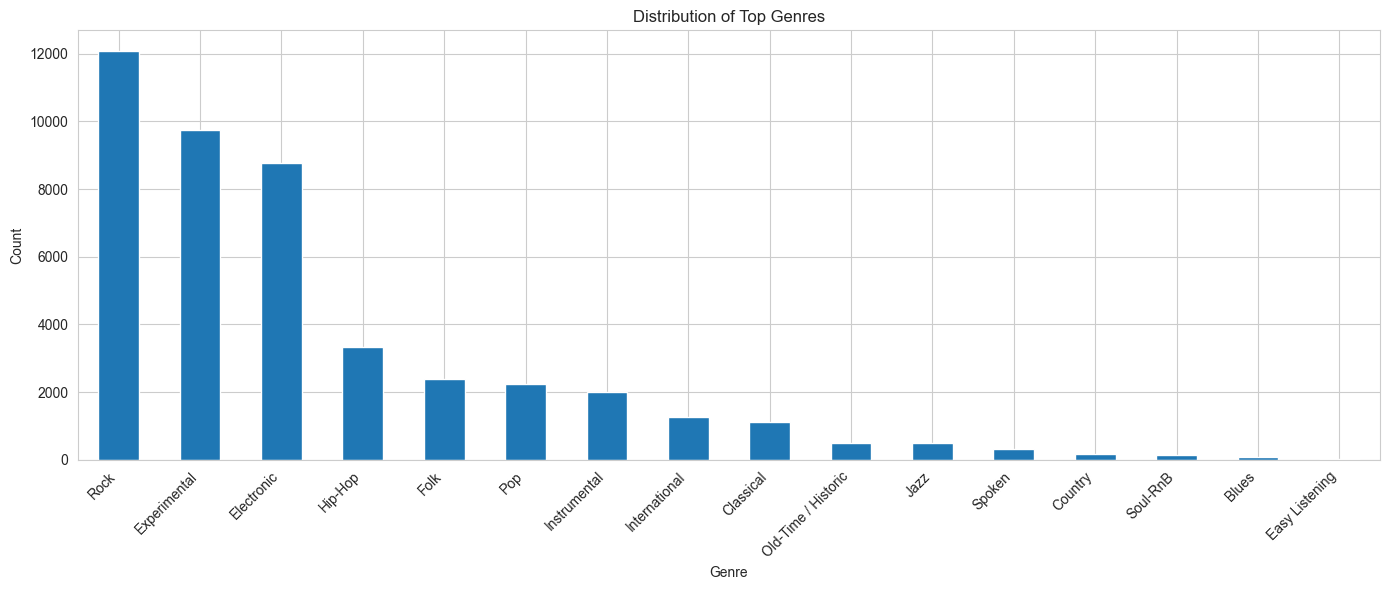

In [19]:
# Genre distribution
print("Genre Distribution:")
print(df['genre_top'].value_counts())

# Visualize genre distribution
plt.figure(figsize=(14, 6))
df['genre_top'].value_counts().plot(kind='bar')
plt.title('Distribution of Top Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [20]:
# Top artists
print("\nTop 10 Artists by Number of Tracks:")
print(df['artist_name'].value_counts().head(10))


Top 10 Artists by Number of Tracks:
artist_name
Kosta T              745
Podington Bear       604
Ergo Phizmiz         499
Blue Dot Sessions    416
Lee Rosevere         369
Mr. & Mrs. Smith     353
Ars Sonor            333
Jahzzar              330
James Kibbie         319
Derek Clegg          316
Name: count, dtype: int64


### 3.3 Correlation Analysis

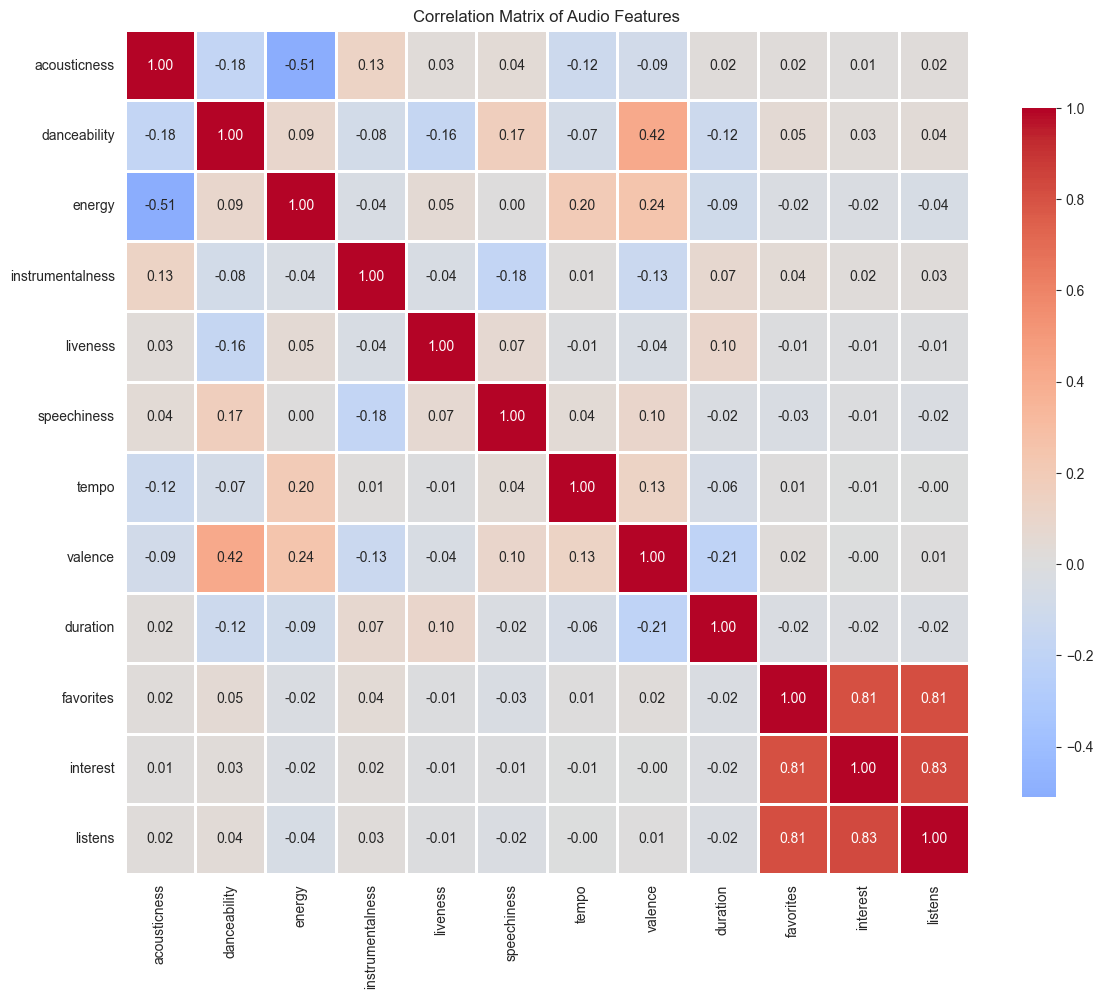

In [21]:
# Correlation matrix for audio features
audio_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 
                  'liveness', 'speechiness', 'tempo', 'valence', 
                  'duration', 'favorites', 'interest', 'listens']

correlation_matrix = df[audio_features].corr()

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Audio Features')
plt.tight_layout()
plt.show()

In [22]:
# Find highly correlated features (> 0.7 or < -0.7)
high_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

if high_corr:
    print("\nHighly Correlated Features (|correlation| > 0.7):")
    print(pd.DataFrame(high_corr))
else:
    print("\nNo highly correlated features found (|correlation| > 0.7)")


Highly Correlated Features (|correlation| > 0.7):
   Feature 1 Feature 2  Correlation
0  favorites  interest     0.809269
1  favorites   listens     0.811502
2   interest   listens     0.833754


### 3.4 Bivariate Analysis - Features by Genre

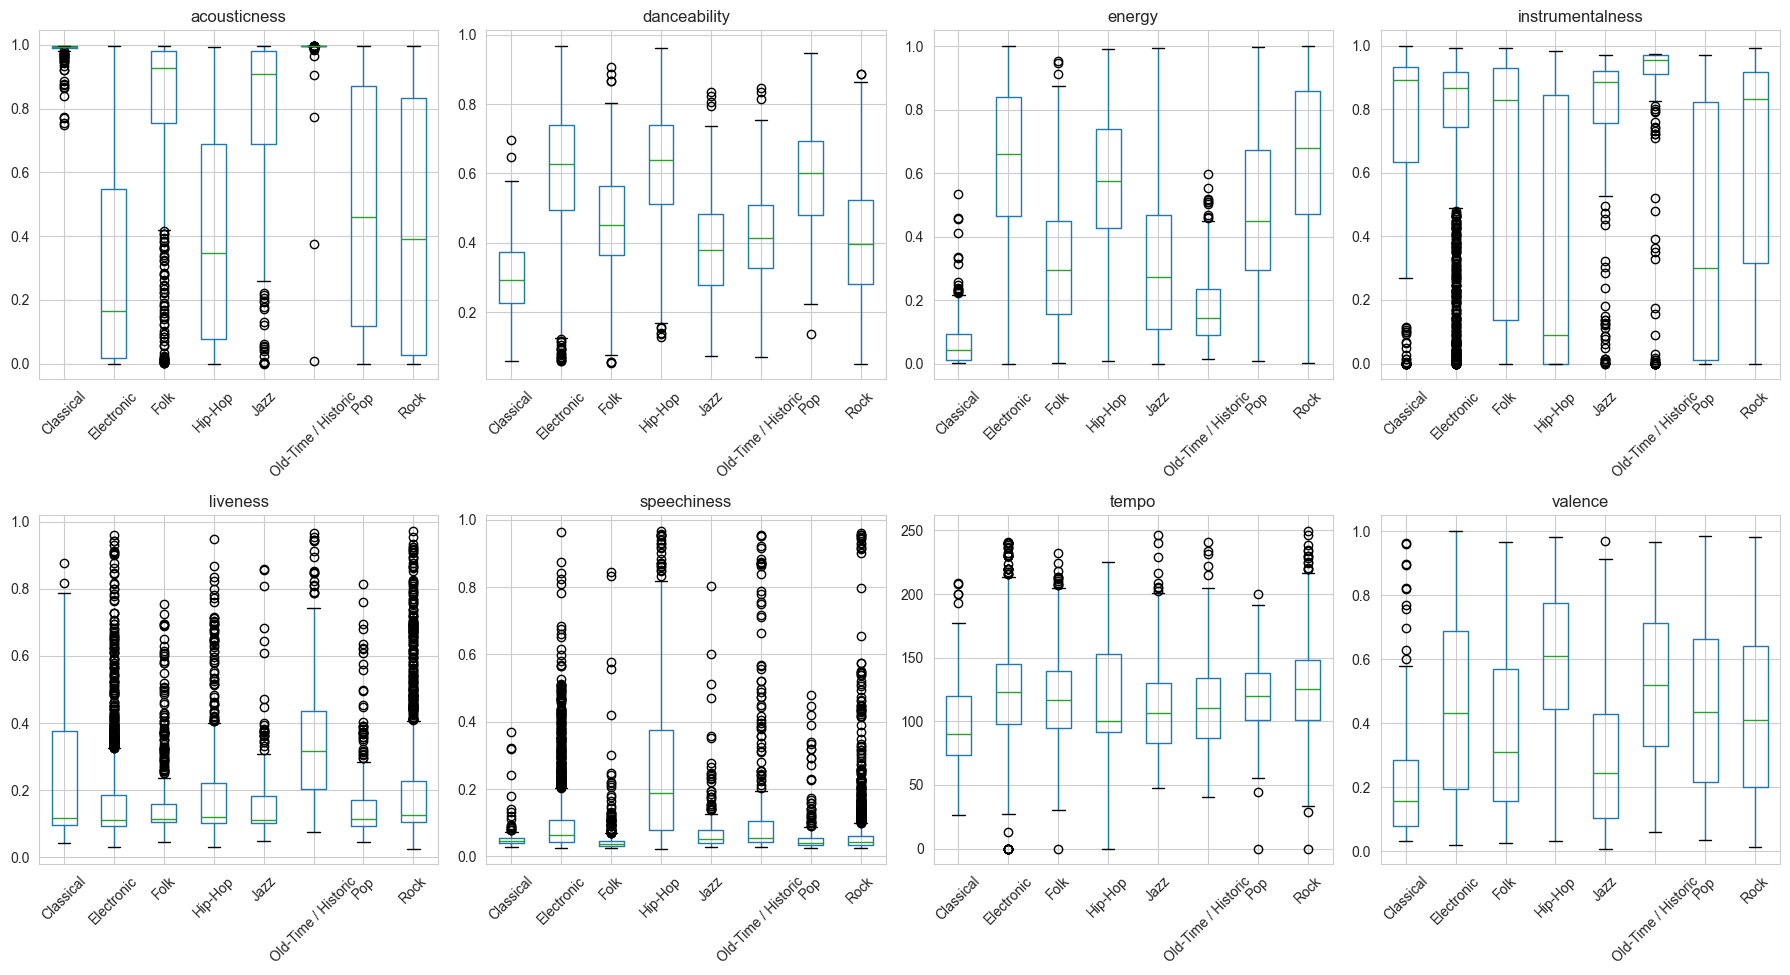

In [23]:
# Boxplot: Audio features by genre
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.ravel()

features_to_plot = ['acousticness', 'danceability', 'energy', 'instrumentalness',
                    'liveness', 'speechiness', 'tempo', 'valence']

for idx, feature in enumerate(features_to_plot):
    df_clean = df[['genre_top', feature]].dropna()
    
    # Only plot if we have data
    if len(df_clean) > 0:
        # Get top 8 genres for readability
        top_genres = df_clean['genre_top'].value_counts().head(8).index
        df_plot = df_clean[df_clean['genre_top'].isin(top_genres)]
        
        df_plot.boxplot(column=feature, by='genre_top', ax=axes[idx])
        axes[idx].set_title(feature)
        axes[idx].set_xlabel('')
        axes[idx].get_figure().suptitle('')
        axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [24]:
# Mean audio features by genre
genre_features = df.groupby('genre_top')[features_to_plot].mean()
print("\nMean Audio Features by Genre:")
print(genre_features)


Mean Audio Features by Genre:
                     acousticness  danceability    energy  instrumentalness  \
genre_top                                                                     
Blues                    0.863294      0.469868  0.346132          0.529824   
Classical                0.980735      0.303729  0.074362          0.705485   
Country                       NaN           NaN       NaN               NaN   
Easy Listening                NaN           NaN       NaN               NaN   
Electronic               0.304549      0.599338  0.634367          0.761977   
Experimental             0.616175      0.557034  0.414389          0.478787   
Folk                     0.804267      0.453932  0.310260          0.606656   
Hip-Hop                  0.398385      0.622686  0.574543          0.365489   
Instrumental             0.627749      0.485167  0.431787          0.714347   
International            0.786429      0.508657  0.425858          0.590729   
Jazz                 

## Step 4: Variable Transformation and Feature Engineering

### 4.1 Handle Missing Values

In [25]:
# Create a cleaned version of the dataset
df_clean = df.copy()

# Strategy for handling missing values:
# 1. For location data (latitude/longitude): Keep as NaN (not critical for most analyses)
# 2. For audio features: Remove rows with missing audio features (as they're critical)
# 3. For genre_top: Can be analyzed separately

print("Original dataset shape:", df_clean.shape)

# Check which rows have missing audio features
audio_feature_cols = ['acousticness', 'danceability', 'energy', 'instrumentalness', 
                      'liveness', 'speechiness', 'tempo', 'valence']

missing_audio = df_clean[audio_feature_cols].isnull().any(axis=1).sum()
print(f"Rows with missing audio features: {missing_audio}")

# Option: Keep all rows, handle missing in specific analyses
# Or drop rows with missing critical features
# df_clean = df_clean.dropna(subset=audio_feature_cols)
# print("Dataset shape after removing missing audio features:", df_clean.shape)

Original dataset shape: (99995, 43)
Rows with missing audio features: 89589


### 4.2 Create New Features

In [26]:
# 1. Duration in minutes
df_clean['duration_minutes'] = df_clean['duration'] / 60

# 2. Popularity score (combining favorites, interest, and listens)
df_clean['popularity_score'] = (
    df_clean['favorites'] * 3 +  # Weight favorites more
    df_clean['interest'] + 
    df_clean['listens']
) / 5

# 3. Engagement rate (listens per interest)
df_clean['engagement_rate'] = df_clean['listens'] / (df_clean['interest'] + 1)  # +1 to avoid division by zero

# 4. Energy categories
df_clean['energy_category'] = pd.cut(df_clean['energy'], 
                                      bins=[0, 0.33, 0.66, 1.0], 
                                      labels=['Low', 'Medium', 'High'])

# 5. Tempo categories (BPM ranges)
df_clean['tempo_category'] = pd.cut(df_clean['tempo'], 
                                     bins=[0, 90, 120, 140, 300], 
                                     labels=['Slow', 'Moderate', 'Fast', 'Very Fast'])

# 6. Acoustic-Electronic spectrum
df_clean['acoustic_electronic_balance'] = df_clean['acousticness'] - (1 - df_clean['acousticness'])

# 7. Mood indicator (combining valence and energy)
df_clean['mood_score'] = (df_clean['valence'] + df_clean['energy']) / 2

# 8. Has location (binary feature)
df_clean['has_location'] = (~df_clean['artist_latitude'].isnull()).astype(int)

print("New features created:")
new_features = ['duration_minutes', 'popularity_score', 'engagement_rate', 
                'energy_category', 'tempo_category', 'acoustic_electronic_balance',
                'mood_score', 'has_location']
print(new_features)
print("\nSample of new features:")
print(df_clean[new_features].head())

New features created:
['duration_minutes', 'popularity_score', 'engagement_rate', 'energy_category', 'tempo_category', 'acoustic_electronic_balance', 'mood_score', 'has_location']

Sample of new features:
   duration_minutes  popularity_score  engagement_rate energy_category  \
0          2.183333             190.2         0.297003          Medium   
1          3.083333             204.0         0.354111            High   
2          3.050000             193.4         0.299329          Medium   
3          3.550000             238.0         0.261473            High   
4          2.700000             210.6         0.222738          Medium   

  tempo_category  acoustic_electronic_balance  mood_score  has_location  
0      Very Fast                    -0.253922    0.560242             0  
1      Very Fast                     0.816430    0.639707             0  
2           Fast                    -0.591778    0.565536             0  
3           Slow                    -0.071045    0.693

### 4.3 Transform Skewed Features

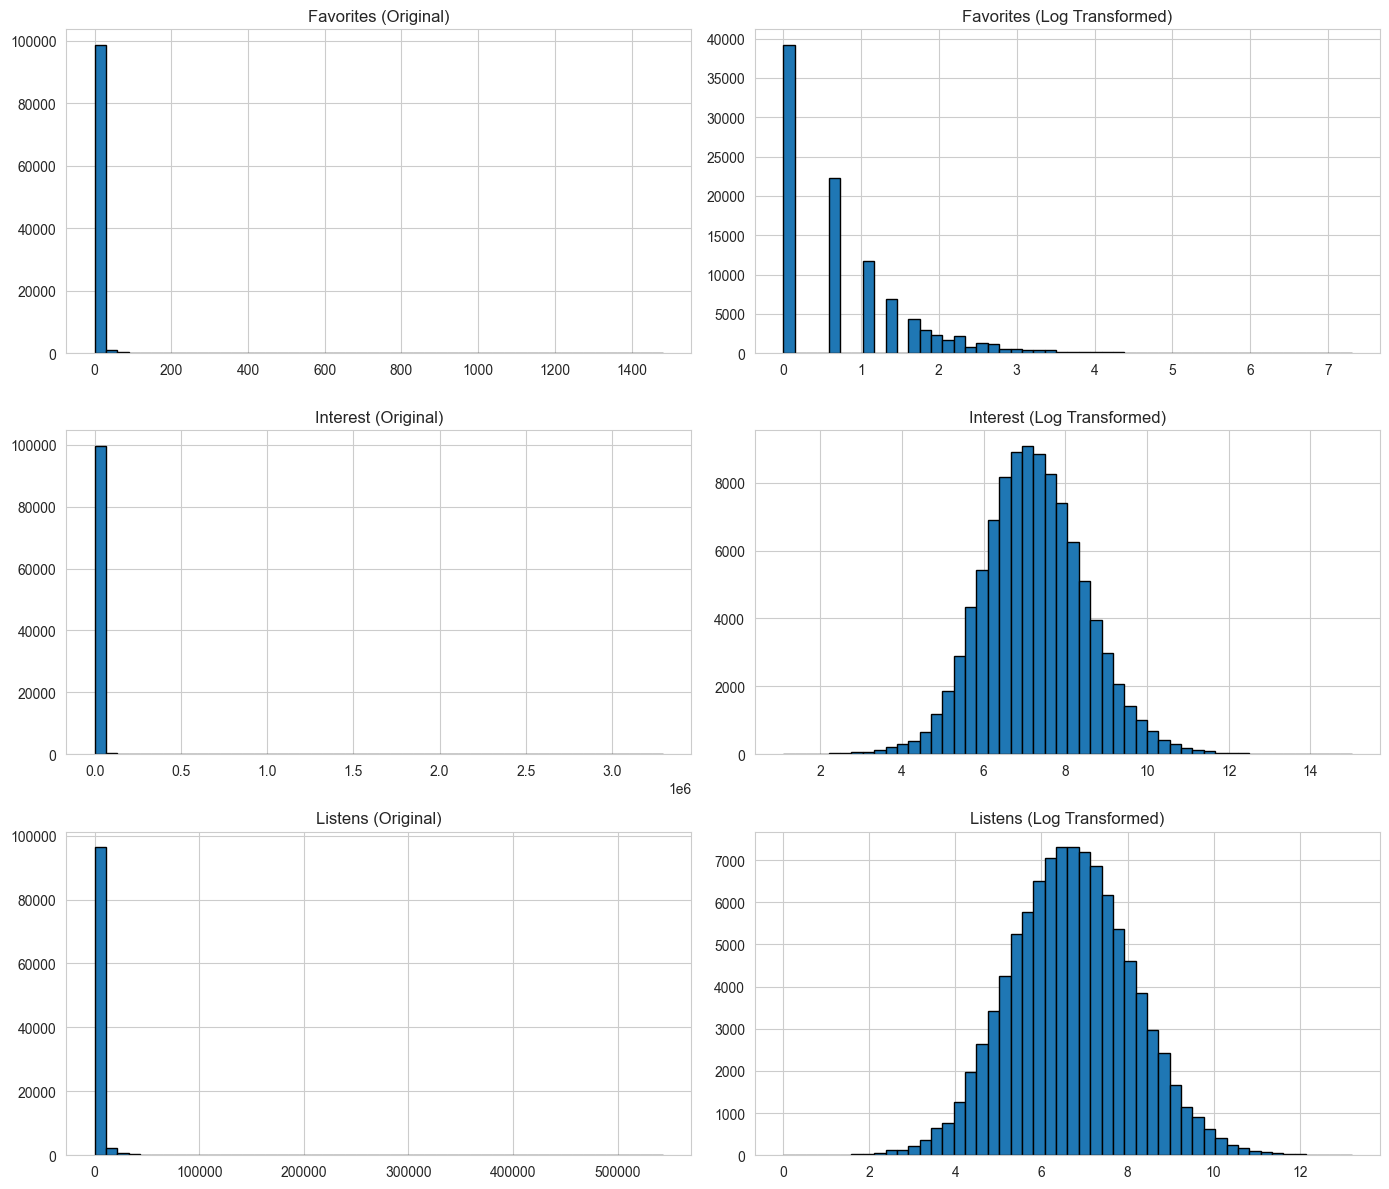

In [27]:
# Log transformation for highly skewed features (favorites, interest, listens)
# These features often have a long tail distribution

df_clean['log_favorites'] = np.log1p(df_clean['favorites'])  # log1p = log(1+x) to handle zeros
df_clean['log_interest'] = np.log1p(df_clean['interest'])
df_clean['log_listens'] = np.log1p(df_clean['listens'])

# Compare distributions
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# Favorites
axes[0, 0].hist(df_clean['favorites'], bins=50, edgecolor='black')
axes[0, 0].set_title('Favorites (Original)')
axes[0, 1].hist(df_clean['log_favorites'], bins=50, edgecolor='black')
axes[0, 1].set_title('Favorites (Log Transformed)')

# Interest
axes[1, 0].hist(df_clean['interest'], bins=50, edgecolor='black')
axes[1, 0].set_title('Interest (Original)')
axes[1, 1].hist(df_clean['log_interest'], bins=50, edgecolor='black')
axes[1, 1].set_title('Interest (Log Transformed)')

# Listens
axes[2, 0].hist(df_clean['listens'], bins=50, edgecolor='black')
axes[2, 0].set_title('Listens (Original)')
axes[2, 1].hist(df_clean['log_listens'], bins=50, edgecolor='black')
axes[2, 1].set_title('Listens (Log Transformed)')

plt.tight_layout()
plt.show()

### 4.4 Encode Categorical Variables

In [29]:
# Label encode genre_top for future modeling
from sklearn.preprocessing import LabelEncoder

le_genre = LabelEncoder()
df_clean['genre_encoded'] = le_genre.fit_transform(df_clean['genre_top'].fillna('Unknown'))

print("Genre encoding mapping:")
genre_mapping = dict(zip(le_genre.classes_, le_genre.transform(le_genre.classes_)))
for genre, code in sorted(genre_mapping.items(), key=lambda x: x[1]):
    print(f"  {code}: {genre}")

Genre encoding mapping:
  0: Blues
  1: Classical
  2: Country
  3: Easy Listening
  4: Electronic
  5: Experimental
  6: Folk
  7: Hip-Hop
  8: Instrumental
  9: International
  10: Jazz
  11: Old-Time / Historic
  12: Pop
  13: Rock
  14: Soul-RnB
  15: Spoken
  16: Unknown


### 4.5 Summary Statistics of Transformed Dataset

In [30]:
print("Final dataset summary:")
print(f"Shape: {df_clean.shape}")
print(f"\nColumn count by type:")
print(df_clean.dtypes.value_counts())

print("\n" + "="*80)
print("New Engineered Features Summary:")
print("="*80)
engineered_features = ['duration_minutes', 'popularity_score', 'engagement_rate',
                       'acoustic_electronic_balance', 'mood_score', 
                       'log_favorites', 'log_interest', 'log_listens', 
                       'has_location', 'genre_encoded']
print(df_clean[engineered_features].describe())

Final dataset summary:
Shape: (99995, 55)

Column count by type:
float64     39
int64        8
object       6
category     1
category     1
Name: count, dtype: int64

New Engineered Features Summary:
       duration_minutes  popularity_score  engagement_rate  \
count      99995.000000      99995.000000     99995.000000   
mean           4.633909       1208.284788         0.637259   
std            4.915671       5373.323436         0.219353   
min            0.000000          0.600000         0.000000   
25%            2.516667        188.600000         0.495654   
50%            3.633333        431.200000         0.697479   
75%            5.116667       1041.500000         0.809086   
max          183.833333     768251.000000         3.895899   

       acoustic_electronic_balance    mood_score  log_favorites  log_interest  \
count                 10553.000000  10532.000000   99995.000000  99995.000000   
mean                     -0.021242      0.495647       0.827496      7.239087  

## Summary and Key Findings

### Phase 1 Completion Checklist:

✅ **Step 1: Merging and Cleaning**
- Loaded 4 datasets (tracks, genres, echonest_features, spectral_features)
- Merged datasets on `track_id`
- Cleaned column names (lowercase, underscores)

✅ **Step 2: Data Quality Assessment**
- Analyzed missing values across all features
- Checked for duplicate records
- Identified data type inconsistencies
- Validated logical constraints (e.g., non-negative values)

✅ **Step 3: Statistical Analysis**
- **Univariate**: Distributions of numerical and categorical features
- **Bivariate**: Audio features by genre analysis
- **Multivariate**: Correlation analysis between features
- Identified relationships and patterns in the data

✅ **Step 4: Feature Engineering**
- Created new features:
  - `duration_minutes`: Duration converted to minutes
  - `popularity_score`: Composite metric from favorites, interest, listens
  - `engagement_rate`: Listens per interest ratio
  - `energy_category`: Low/Medium/High energy bins
  - `tempo_category`: Tempo classification (Slow/Moderate/Fast/Very Fast)
  - `acoustic_electronic_balance`: Acoustic vs electronic spectrum
  - `mood_score`: Combined valence and energy
  - `has_location`: Binary indicator for artist location data
- Applied log transformations to skewed features (favorites, interest, listens)
- Encoded categorical variables (genre_top)

### Ready for Next Phase:
The data is now cleaned, analyzed, and enriched with engineered features for building prediction models.

### Optional: Save Cleaned Dataset

In [ ]:
# Uncomment to save the cleaned and processed dataset
# df_clean.to_csv('../DataBase/processed/tracks_cleaned.csv', index=False)
# print("Cleaned dataset saved to '../DataBase/processed/tracks_cleaned.csv'")